In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io 

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [18]:
# Create the Suburban and Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [21]:
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

# Create a PyBer Summary DataFrame

In [22]:
# Total Rides per City
total_rides=pyber_data_df.groupby(["type"]).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [23]:
# Total_rides_df
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [24]:
# Total Drivers per City Type
total_driver_count=city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [25]:
#Total Fare per City Type
total_fare=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [26]:
# Average Fare per Ride Per City Type
avg_ride_fare=pyber_data_df.groupby(["type"]).mean()["fare"]
avg_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [27]:
# Average Fare per Driver per City Type
avg_driver_fare = total_fare/total_driver_count
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [28]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [29]:
#City Type new DataFrame
city_summary_df=pd.DataFrame()

city_summary_df["Total Rides"]=total_rides
city_summary_df["Total Drivers"]=total_driver_count
city_summary_df["Total Fares"]=total_fare
city_summary_df["Average Fare per Ride"]=avg_ride_fare
city_summary_df["Average Fare per Driver"]=avg_driver_fare

city_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [30]:
# Summary DataFrame for each city type:
city_summary_df["Total Rides"]=city_summary_df["Total Rides"].map("{:,}".format)
city_summary_df["Total Drivers"]=city_summary_df["Total Drivers"].map("{:,}".format)
city_summary_df["Total Fares"]=city_summary_df["Total Fares"].map("${:,.2f}".format)
city_summary_df["Average Fare per Ride"]=city_summary_df["Average Fare per Ride"].map("${:.2f}".format)
city_summary_df["Average Fare per Driver"]=city_summary_df["Average Fare per Driver"].map("${:.2f}".format)

city_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Create a Multiple-Line Plot for the Sum of the Fares for Each City Type

In [31]:
# 1. Rename DataFrame Columns
pyber_data_df.rename(columns={'city':'City',
                            'date':'Date',
                            'fare':'Fare',
                            'ride_id':'Ride Id',
                            'driver_count':'No. Drivers', 
                            'type':'City Type'}, inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [32]:
# 2. Set the Index to Date Column
pyber_data_df.set_index(pyber_data_df['Date'], inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [33]:
# 3. Create a new DataFrame for fares and include only the Date, City Type, and Fare columns
pyber_data_copy_df = pyber_data_df.copy()
pyber_data_copy_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [34]:
# 4. Drop the extra Date column, no. Drivers and Ride Id from the Data Frame
pyber_data_copy_df.drop(['Ride Id', 'No. Drivers', 'Date'], axis=1, inplace=True)
pyber_data_copy_df.head()

,City,Fare,City Type
Date,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,Urban
2019-03-04 18:24:09,South Michelleport,30.24,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,Urban
2019-03-06 04:28:35,South Jack,34.58,Urban


In [35]:
# 5. Set the index to the datetime data type.
pyber_data_copy_df.index=pd.to_datetime(pyber_data_copy_df.index)
pyber_data_copy_df.head()

,City,Fare,City Type
Date,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,Urban
2019-03-04 18:24:09,South Michelleport,30.24,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,Urban
2019-03-06 04:28:35,South Jack,34.58,Urban


In [36]:
# 6. Check the DataFrame using the info() method to make sure the index is a datetime data type.
pyber_data_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       2375 non-null   object 
 1   Fare       2375 non-null   float64
 2   City Type  2375 non-null   object 
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [37]:
# 7. Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
city_date_sum_fare=pyber_data_copy_df.groupby(["City Type", "Date"]).sum()["Fare"]
city_date_sum_fare.head()

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
Name: Fare, dtype: float64

In [38]:
# 8. Reset the index
pyber_data_copy_df=pyber_data_copy_df.reset_index()
pyber_data_copy_df.head()

,Date,City,Fare,City Type
0,2019-01-14 10:14:22,Lake Jonathanshire,13.83,Urban
1,2019-03-04 18:24:09,South Michelleport,30.24,Urban
2,2019-02-24 04:29:00,Port Samanthamouth,33.44,Urban
3,2019-02-10 23:22:03,Rodneyfort,23.44,Urban
4,2019-03-06 04:28:35,South Jack,34.58,Urban


In [39]:
# 9. Create Pivot Table Data Frame
pyber_data_copy_pivot_df=pyber_data_copy_df.pivot(index="Date", columns="City Type")["Fare"]
pyber_data_copy_pivot_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [40]:
# 10. Create a new DataFrame from the pivot table DataFrame on the given dates ('2019-01-01':'2019-04-28')
new_data_df=pyber_data_copy_pivot_df.loc['2019-01-01':'2019-04-28']
new_data_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [41]:
# 11. Create a new DataFrame by setting the DataFrame. Use Resample
weekly_data_df=new_data_df.resample('W').sum()
weekly_data_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


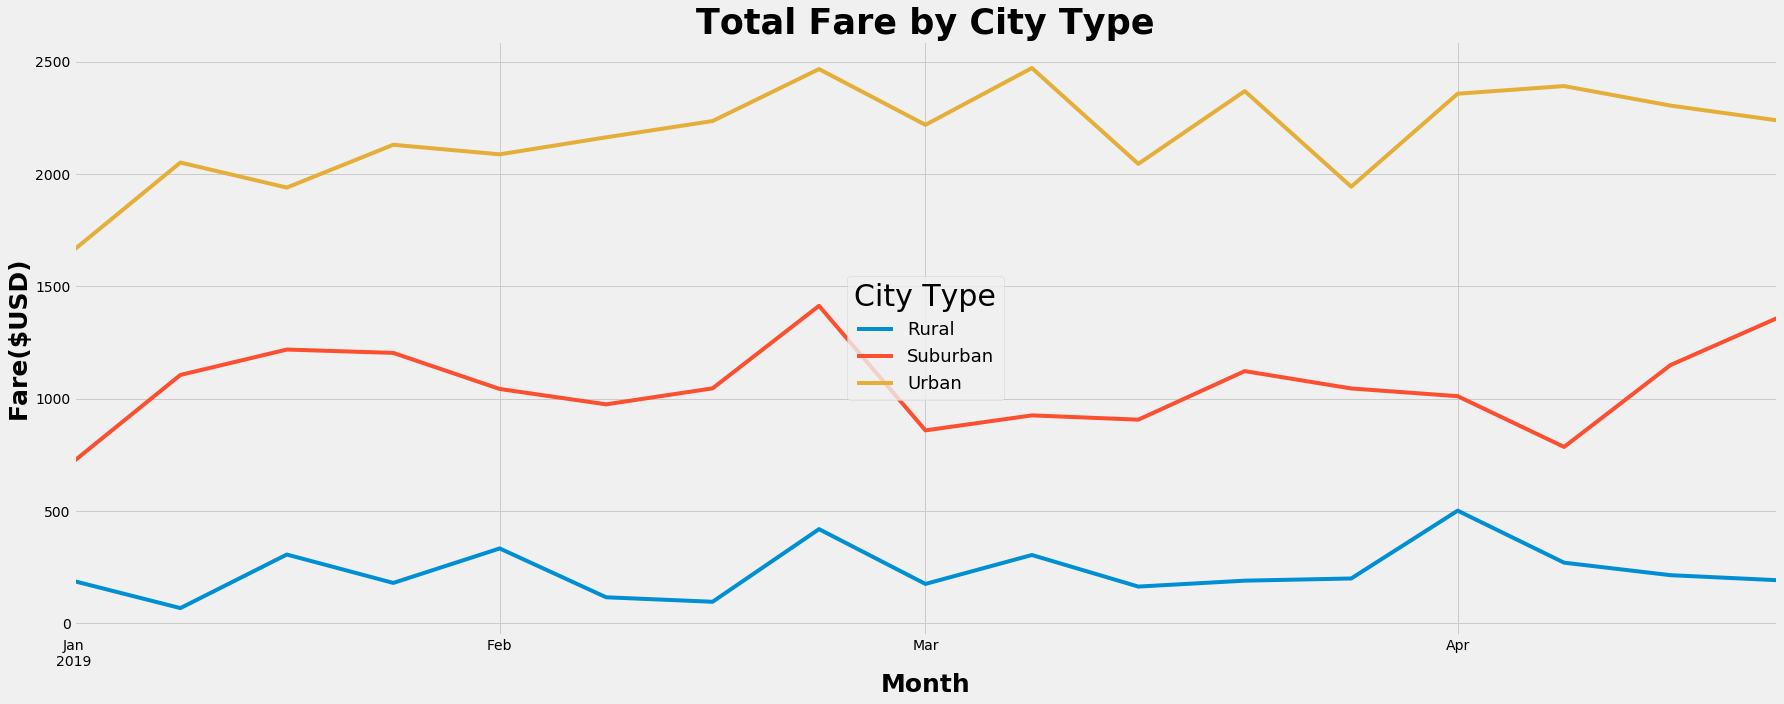

In [42]:
# 12. Using the object-oriented interface method
plt.style.use('fivethirtyeight')

weekly_data_df.plot(figsize=(25,10))

plt.xlabel("Month", weight="bold", fontsize=25)
plt.ylabel("Fare($USD)", weight="bold", fontsize=25)
plt.title("Total Fare by City Type", weight="bold", fontsize=35)
plt.legend(title="City Type", title_fontsize=30, fontsize=18, loc="center")
plt.tight_layout()

# Save the figure.
plt.savefig("analysis/Pyber_Challenge.png")

plt.show()